<a href="https://colab.research.google.com/github/merajali384022/mehraj-ali/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets


In [3]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/spscientist/students-performance-in-exams")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: merajali22
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams


100%|██████████| 8.70k/8.70k [00:00<00:00, 14.1MB/s]

In [5]:
import pandas as pd
data=pd.read_csv("/content/students-performance-in-exams/StudentsPerformance.csv")


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [7]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [9]:
data.shape

(1000, 8)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [13]:
dups=data.duplicated()
print('Number of duplicated rows=%d'%(dups.sum()))
data[dups]


Number of duplicated rows=0


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


In [14]:
data.shape

(1000, 8)

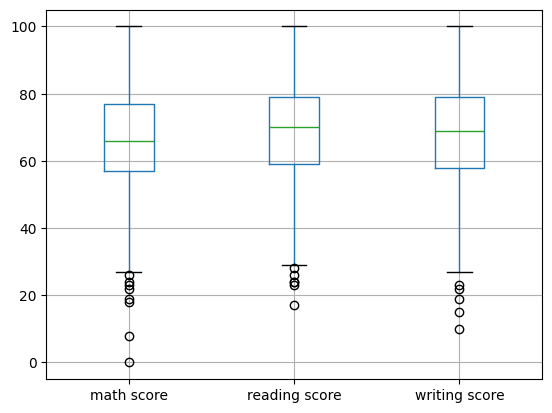

In [17]:
# Visualize the distribution of numerical columns for outlier detection
data.boxplot(column=['math score', 'reading score', 'writing score'])
plt.show()

In [26]:
def remove_outliers(col):
   sorted_col = sorted(col) # It's better to work with the original Series for quantile calculation
   Q1,Q3=col.quantile([0.25,0.75])
   IQR=Q3-Q1
   lower_range=Q1-(1.5*IQR)
   upper_range=Q3+(1.5*IQR)
   return lower_range,upper_range # Return the calculated ranges


In [27]:
lrincome,urincome=remove_outliers(data['math score'])
print('Lower Income Range:',lrincome)
print('Upper Income Range:',urincome)

lrincome,urincome=remove_outliers(data['reading score'])
print('Lower Income Range:',lrincome)
print('Upper Income Range:',urincome)

lrincome,urincome=remove_outliers(data['writing score'])
print('Lower Income Range:',lrincome)
print('Upper Income Range:',urincome)

data.shape

Lower Income Range: 27.0
Upper Income Range: 107.0
Lower Income Range: 29.0
Upper Income Range: 109.0
Lower Income Range: 25.875
Upper Income Range: 110.875


(1000, 8)

In [22]:
data.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [29]:
# Check the data types of columns with null values
# Based on data.isnull().sum(), there are no null values in this dataset.
# If there were null values, you could use the following code:
# data[data.isnull().sum()[data.isnull().sum() > 0].index].dtypes

# Since there are no null values, we can just display the dtypes of all columns
print(data.dtypes)

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


In [34]:
#numerical values
median1=data['math score'].median()
median2=data['reading score'].median()
median3=data['writing score'].median()

# Since there are no null values:

print(f"Median math score: {median1}")
print(f"Median reading score: {median2}")
print(f"Median writing score: {median3}")

Median math score: 67.0
Median reading score: 69.0
Median writing score: 70.0


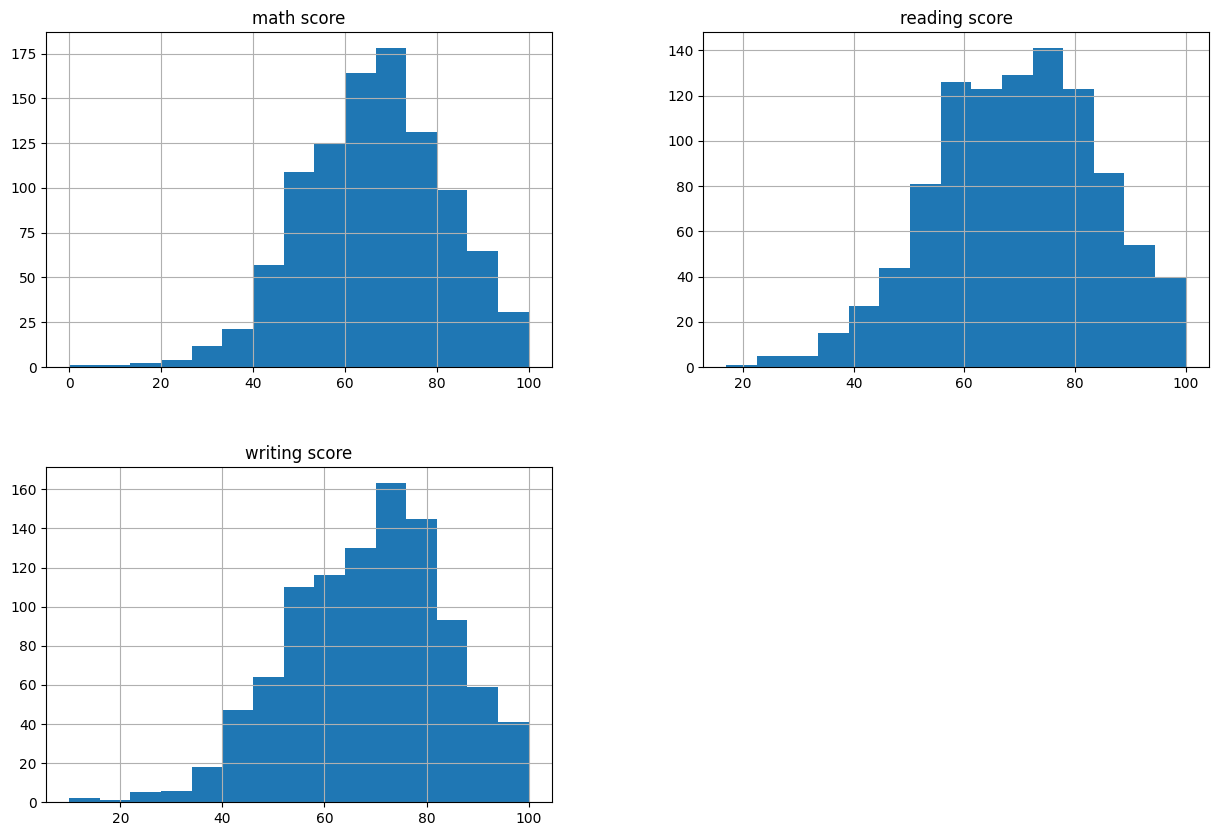

In [72]:
#plot histograms for numerical columns
data.select_dtypes(include=[np.number]).hist(bins=15,figsize=(15,10))
plt.show()

In [36]:
#replace null in catergorical values
mode1=data['gender'].mode()[0]
mode2=data['race/ethnicity'].mode()[0]
mode3=data['parental level of education'].mode()[0]
mode4=data['lunch'].mode()[0]
mode5=data['test preparation course'].mode()[0]

# Since there are no null values:

# You can print the modes if you want to see them
print(f"Mode of gender: {mode1}")
print(f"Mode of race/ethnicity: {mode2}")
print(f"Mode of parental level of education: {mode3}")
print(f"Mode of lunch: {mode4}")
print(f"Mode of test preparation course: {mode5}")

Mode of gender: male
Mode of race/ethnicity: group D
Mode of parental level of education: some college
Mode of lunch: standard
Mode of test preparation course: none


In [37]:
data.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


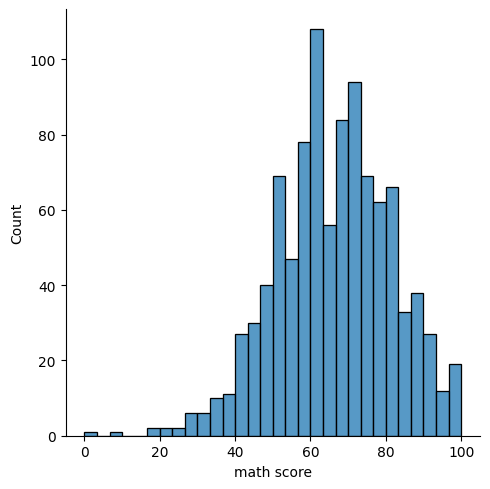

In [46]:
#UNIVARIATE ANALYSIS
sns.displot(data['math score'],bins=30)

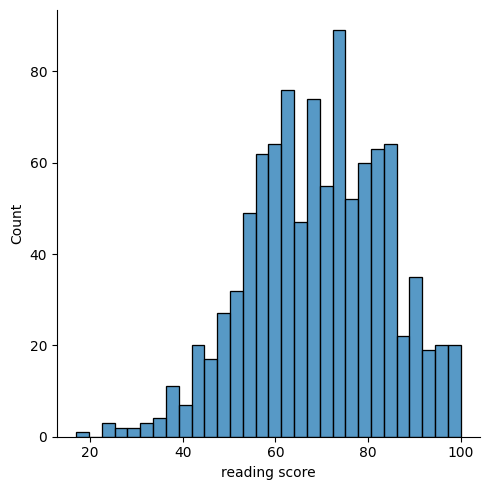

In [69]:
sns.displot(data['reading score'],bins=30)

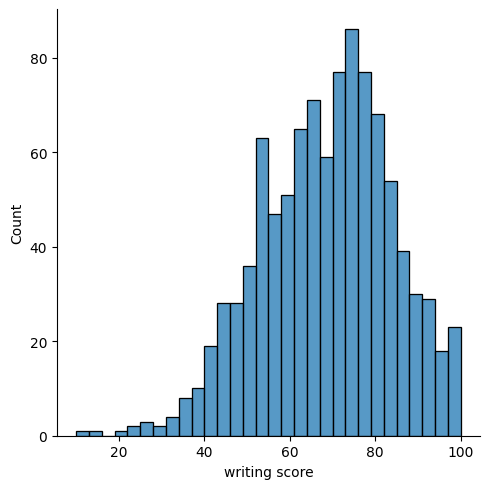

In [70]:
sns.displot(data['writing score'],bins=30)

<Axes: xlabel='count', ylabel='gender'>

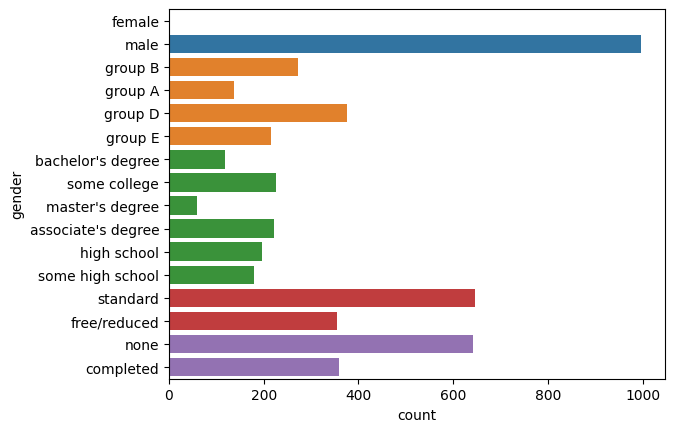

In [71]:
sns.countplot(data['gender'])
sns.countplot(data['race/ethnicity'])
sns.countplot(data['parental level of education'])
sns.countplot(data['lunch'])
sns.countplot(data['test preparation course'])

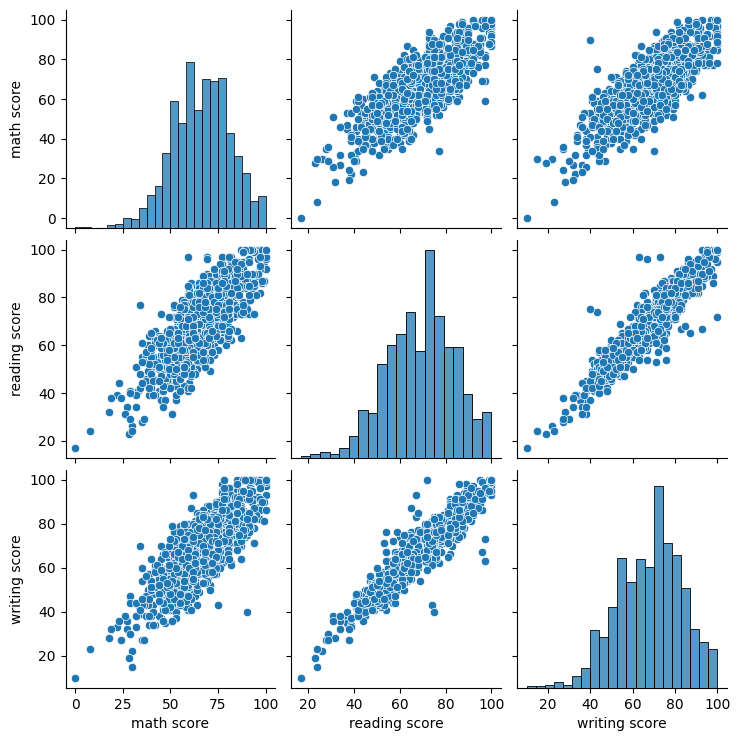

In [78]:
#BIVARIATE ANALYSIS
sns.pairplot(data[['math score','reading score','writing score']])
plt.show()

In [75]:
# Calculate correlation only on numerical columns
numerical_data = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_data.corr()
print(correlation_matrix)

               math score  reading score  writing score
math score       1.000000       0.802282       0.791277
reading score    0.802282       1.000000       0.933149
writing score    0.791277       0.933149       1.000000


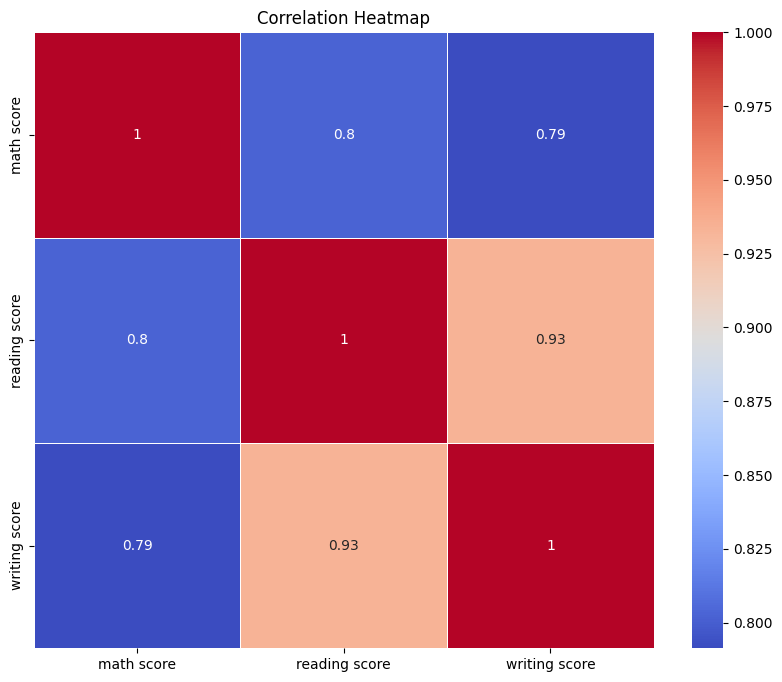

In [76]:
#correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [81]:
#normalizing and scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data_scaled= pd.DataFrame(scaler.fit_transform(data.select_dtypes(include=[np.number])),
                     columns=data.select_dtypes(include=[np.number]).columns)
display(data_scaled.head())

,math score,reading score,writing score
0,0.72,0.662651,0.711111
1,0.69,0.879518,0.866667
2,0.90,0.939759,0.922222
3,0.47,0.481928,0.377778
4,0.76,0.734940,0.722222


from matplotlib import pyplot as plt
_df_19['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20['math score'].plot(kind='hist', bins=20, title='math score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21['reading score'].plot(kind='hist', bins=20, title='reading score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22['writing score'].plot(kind='hist', bins=20, title='writing score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='index', y='math score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24.plot(kind='scatter', x='math score', y='reading score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25.plot(kind='scatter', x='reading score', y='writing score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['math score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_26.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('math score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['reading score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_27.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('reading score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['writing score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_28.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('writing score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_29.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_30['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_31['math score'].plot(kind='line', figsize=(8, 4), title='math score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_32['reading score'].plot(kind='line', figsize=(8, 4), title='reading score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_33['writing score'].plot(kind='line', figsize=(8, 4), title='writing score')
plt.gca().spines[['top', 'right']].set_visible(False)

In [85]:
#scales the data.Essentially returns the z-scores of every attribute
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
data_scaled

,math score,reading score,writing score
0,0.389702,0.187492,0.383926
1,0.193346,1.408936,1.296330
2,1.567840,1.748226,1.622188
3,-1.246601,-0.830379,-1.571224
4,0.651510,0.594640,0.449098
...,...,...,...
995,1.436936,2.019659,1.752531
996,-0.264819,-0.966095,-0.854335
997,-0.461176,0.119634,-0.202619
998,0.127893,0.594640,0.579441


In [88]:
# Scales the 'math score' column and assigns it to a new column 'scaled_math_score'
# If you intended to scale a different column, replace 'math score' with the correct column name.
data['scaled_math_score'] = std_scaler.fit_transform(data[['math score']])
data['scaled_reading_score']=std_scaler.fit_transform(data[['reading score']])
data['scaled_writing_score']=std_scaler.fit_transform(data[['writing score']])
# Display the DataFrame with the new scaled column
display(data.head())

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,scaled_math_score,scaled_reading_score,scaled_writing_score
0,female,group B,bachelor's degree,standard,none,0.72,0.662651,0.711111,0.389702,0.187492,0.383926
1,female,group B,some college,standard,completed,0.69,0.879518,0.866667,0.193346,1.408936,1.296330
2,female,group B,master's degree,standard,none,0.90,0.939759,0.922222,1.567840,1.748226,1.622188
3,male,group A,associate's degree,free/reduced,none,0.47,0.481928,0.377778,-1.246601,-0.830379,-1.571224
4,male,group A,some college,standard,none,0.76,0.734940,0.722222,0.651510,0.594640,0.449098


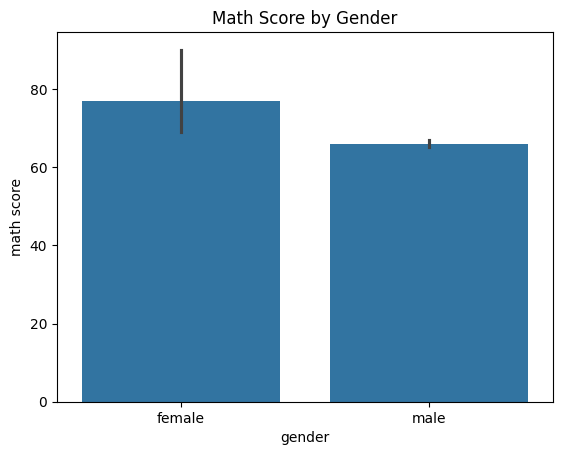

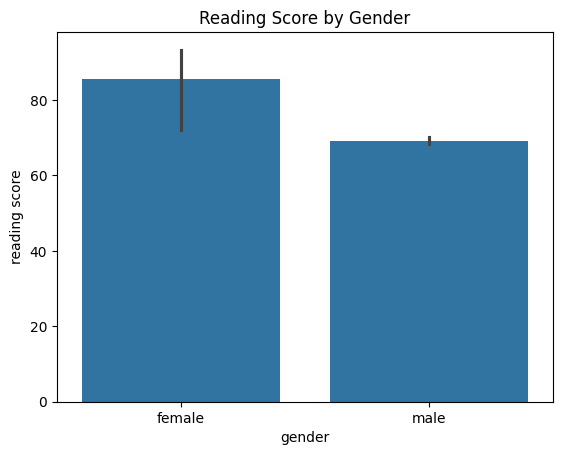

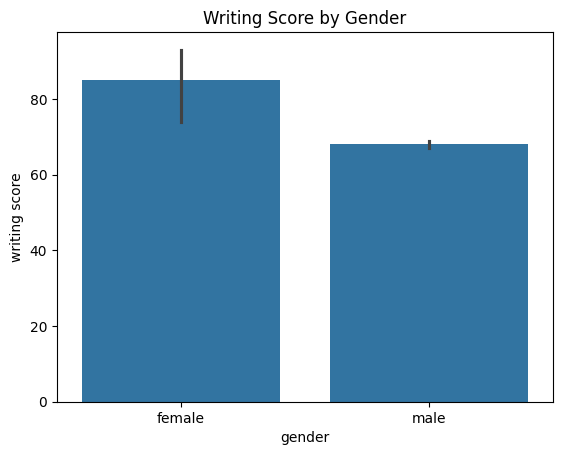

In [63]:
 #boxpots to check distributions and outliers
sns.barplot(data=data, x='gender', y='math score')
plt.title('Math Score by Gender')
plt.show()

sns.barplot(data=data, x='gender', y='reading score')
plt.title('Reading Score by Gender')
plt.show()

sns.barplot(data=data, x='gender', y='writing score')
plt.title('Writing Score by Gender')
plt.show()

In [89]:
#save the cleaned dataset to a new csv file
data.to_csv('cleaned_AQI_data.csv',index=False)